## Plotly

깔끔한 이미지와 상호작용 가능한 그래프를 특징으로 한다.

In [1]:
import pandas as pd
import plotly.express as px
import os

path = 'D:\\elice_python\\GAS_5\\pytest_python\\'

In [2]:
df = pd.read_csv(os.path.join(path, 'cereal.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
 16  cereal    77 non-null     int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 10.4+ KB


In [5]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,Top,1.0,0.33,68.40,1
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,Top,1.0,1.00,33.98,1
2,All-Bran,Kellogs,Cold,70,4,1,260,9.0,7.0,5,320,25,Top,1.0,0.33,59.43,1
3,All-Bran with Extra Fiber,Kellogs,Cold,50,4,0,140,14.0,8.0,0,330,25,Top,1.0,0.50,93.70,1
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,Top,1.0,0.75,34.38,1


In [11]:
fig = px.scatter(df, x='sugars', y='rating', hover_name='name', title='Cereal ratings vs. sugars')
fig.show()

In [17]:
fig = px.scatter(df, x='sugars', 
                 y='rating', 
                 color='mfr', 
                 size='calories', 
                 facet_row = 'shelf',
                 facet_col='type', 
                 hover_name='name',
                 category_orders={'shelf':['Top', 'Middle', 'Bottom']}
                 )

fig.show()

### 히스토그램
px.histogram()
최적화된 값으로 적절히 구간을 나눈다.

In [21]:
fig = px.histogram(df, x='rating', title='Rating distribution',)
fig.show()

### 도넛 그래프
px.sunburst()

In [22]:
fig = px.sunburst(df, path=['mfr', 'shelf'], values='cereal')
fig.show()

mfr 컬럼 내의 shelf 컬럼의 비율을 보여준다.

### 영역 그래프
px.treemap()
- path ; 분리 기준
- values ; 넓이 기준

In [23]:
fig = px. treemap(df,path=['shelf','mfr'], values='cereal', title='Cereals by shelf location')
fig.show()

### 연습문제

In [57]:
df = pd.read_csv(os.path.join(path,'insurance.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
px.scatter(df, x='age', y='charges',
           color='region')

In [31]:
px.histogram(df,x='age', color='region')

In [33]:
px.histogram(df,x='charges', color='region')

In [40]:
px.treemap(df, path=['region','smoker','sex'])

In [39]:
px.treemap(df, path=['region','smoker','sex'],values='charges')

In [100]:
px.scatter(df, x='bmi', y='charges', color='region')

In [45]:
import seaborn as sns


전처리 기준
bmi
18.5,
23.0,
25.0,
30.0,
35.0

sex : {male : 0, female : 1}

smoker : {no:0,yes:1}


In [90]:
df_h = df.copy()

In [60]:
df_h.loc[df_h.bmi < 18.5, 'bmi'] = 0
df_h.loc[(df_h.bmi >= 18.5) & (df_h.bmi < 23.0), 'bmi'] = 1
df_h.loc[(df_h.bmi >= 23.0) & (df_h.bmi < 25.0), 'bmi'] = 2
df_h.loc[(df_h.bmi >= 25.0) & (df_h.bmi < 30.0), 'bmi'] = 3
df_h.loc[(df_h.bmi >= 30.0) & (df_h.bmi < 35.0), 'bmi'] = 4
df_h.loc[df_h.bmi >= 35.0, 'bmi'] = 5

In [91]:
df_h.loc[df_h.sex == 'male','sex'] = 0
df_h.loc[df_h.sex == 'female','sex'] = 1

In [92]:
df_h.loc[df_h.smoker == 'no','smoker'] = 0
df_h.loc[df_h.smoker == 'yes','smoker'] = 1

In [93]:
df_h.loc[df_h.region == 'southeast','region'] = 0
df_h.loc[df_h.region == 'southwest','region'] = 1
df_h.loc[df_h.region == 'northeast','region'] = 2
df_h.loc[df_h.region == 'northwest','region'] = 3

In [69]:
df_h.bmi = df_h.bmi.astype(int)

In [94]:
df_h.sex = df_h.sex.astype(int)
df_h.smoker = df_h.smoker.astype(int)

In [95]:

df_h.region = df_h.region.astype(int)

In [96]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [97]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

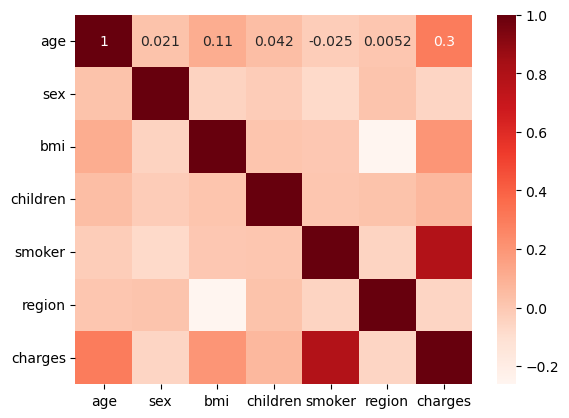

In [98]:
sns.heatmap(df_h.corr(numeric_only=True), annot=True, cmap='Reds')


In [107]:
px.scatter(df, x='bmi', y='charges', color='smoker')

In [118]:
px.scatter(df[(df.sex=='male')&(df.smoker=='no')], x='bmi', y='charges', color='age')

In [112]:
px.scatter(df[(df.sex=='female')&(df.smoker=='no')], x='bmi', y='charges', color='age')

In [128]:
px.histogram(df_h, x='sex', y='smoker', color='sex')